In [14]:
import geopandas

from tqdm import tqdm
from shapely.geometry import Point
from litecoder.models import WOFLocality
from scipy import stats

In [4]:
import matplotlib.pyplot as plt

In [5]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [6]:
df = geopandas.read_file('../data/Massachusetts.geojson')

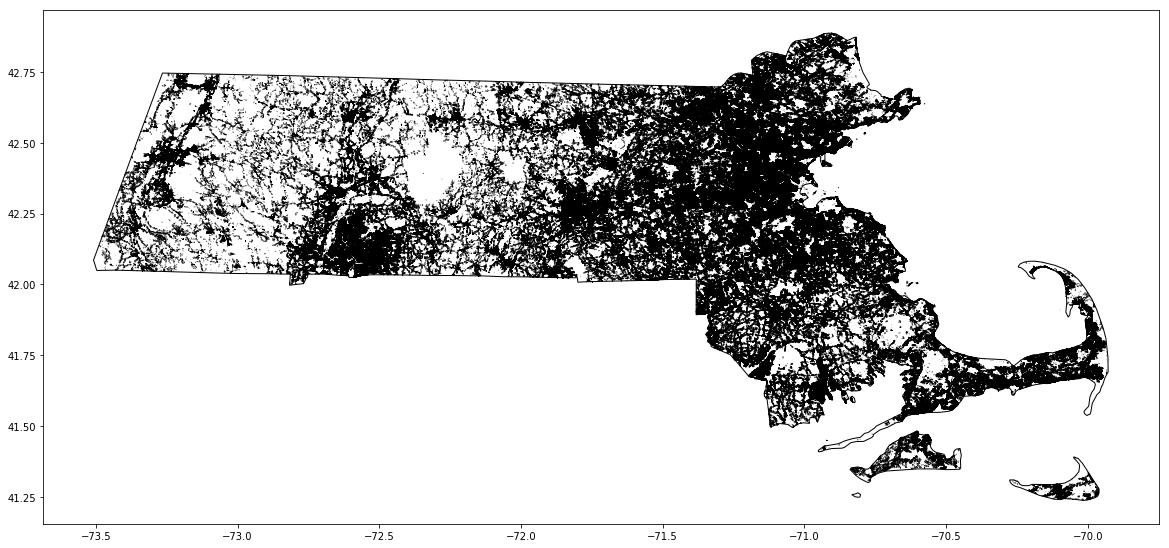

In [7]:
ax = states[states.STUSPS=='MA'].plot(color='white', edgecolor='black', figsize=(20,20))
df.plot(ax=ax, edgecolor='black', figsize=(20,20))

In [8]:
df.sindex

In [15]:
def score(name):
    
    city = WOFLocality.clean_us_cities().filter(WOFLocality.name==name, WOFLocality.name_a1=='Massachusetts').one()
    p = Point(city.longitude, city.latitude)
    pb = p.buffer(1)
    possible_idx = list(df.sindex.intersection(pb.bounds))
    possible = df.iloc[possible_idx]
    
    score = 0
    for b in tqdm(possible.itertuples(), total=len(possible_idx)):
        if b.geometry.centroid.within(pb):
            d = p.distance(b.geometry.centroid)
            score += stats.norm.pdf(d, 0, 0.1)

    return len(possible_idx), score

In [16]:
score('Boston')

100%|██████████| 1649305/1649305 [05:25<00:00, 5073.70it/s]


(1649305, 843862.3441684131)

In [17]:
score('Lunenburg')

100%|██████████| 1690122/1690122 [04:51<00:00, 5801.89it/s]


(1690122, 146930.83489557344)